In [25]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import seaborn as sns
import scipy.stats as st

In [26]:
import sys

In [27]:
sys.getfilesystemencoding()

'mbcs'

In [28]:
sys._enablelegacywindowsfsencoding()

In [29]:
countrie=pd.read_csv(r'2014_data\countries.csv')

In [30]:
income=pd.read_excel(r'2014_data\indicator gapminder gdp_per_capita_ppp.xlsx',index_col=0)

In [31]:
income=income.dropna()

In [32]:
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
GDP per capita,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,1217.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,642.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


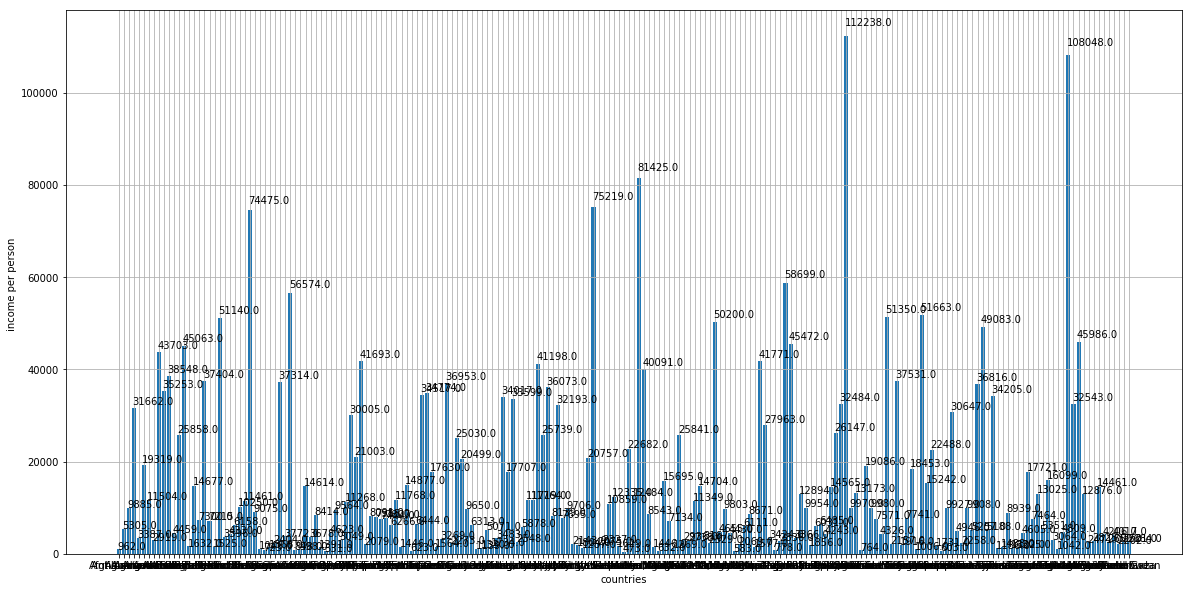

In [33]:
fig,ax=plt.subplots(figsize=(20,10))
ind=np.arange(1,len(income)+1)
rect=ax.bar(ind,height=np.array(income[2000]))
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    ax.text(x+0.1,1.02*height,str(height))
ax.set_xticks(ind)
ax.set_xticklabels(income.index)
ax.set_ylabel("income per person ")
ax.set_xlabel("countries")
ax.grid(True)
plt.show()

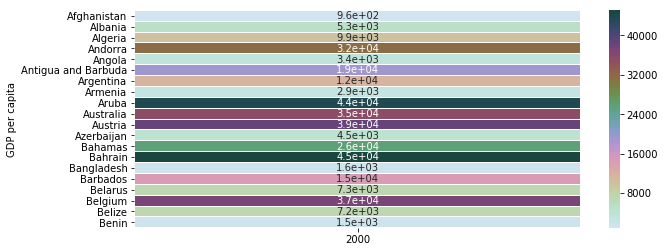

In [34]:
income1=income[2000]
income1=pd.DataFrame(income1)
f, ax1 = plt.subplots(figsize = (10, 4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(income1[:20], cmap = cmap, linewidths = 0.005, ax = ax1,annot=True)

In [35]:
def mergeByYear(year):
    income_temp=pd.DataFrame(income[year])
    income_temp.columns=['Income']
    return pd.merge(countrie,income_temp,left_on='Country',right_index=True,how='outer')

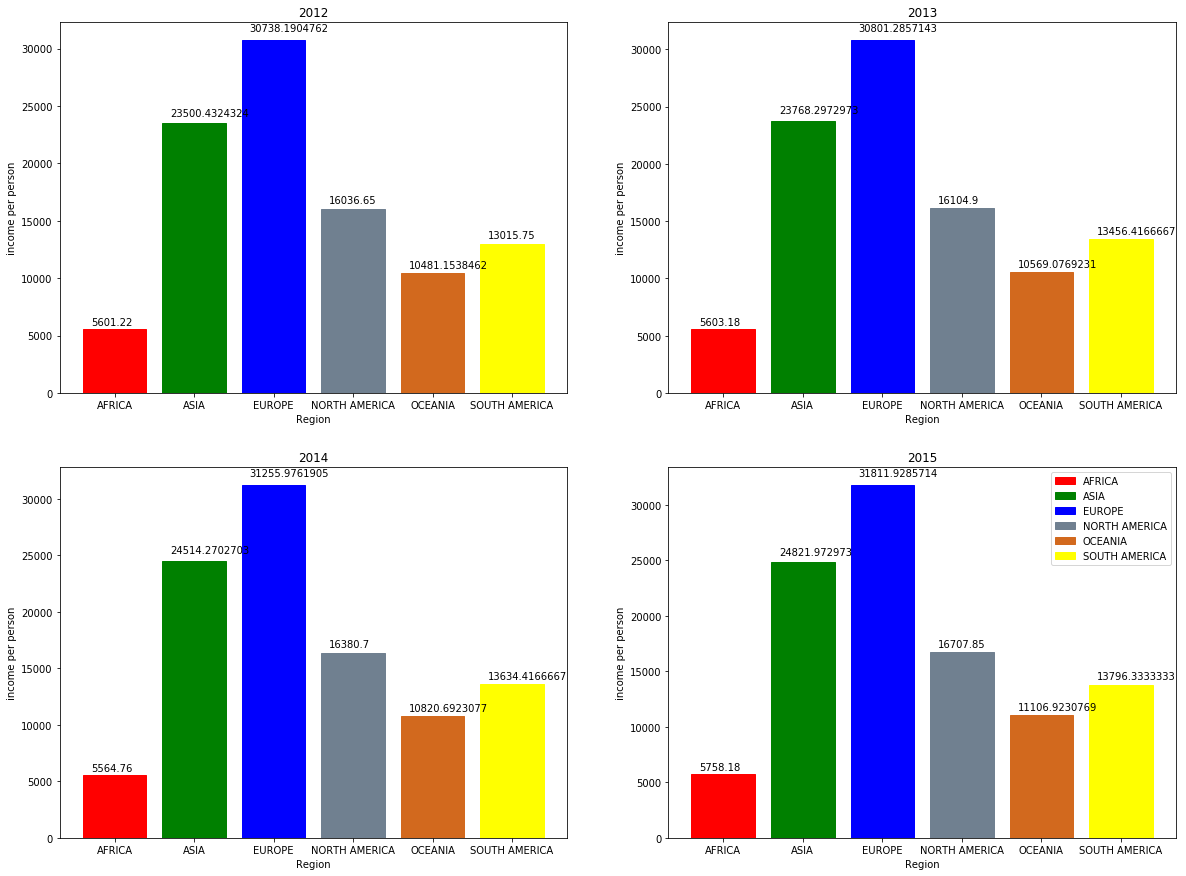

In [41]:
fig,axes=plt.subplots(2,2,figsize=(20, 15))
colors=['red','green','blue','slategray','chocolate','yellow']
for i in range(2):
    for j in range(2):
        data=mergeByYear(2012+i*2+j)
        data1=data.groupby(['Region']).mean()
        ind=np.arange(1,len(data1)+1)
        rect=axes[i,j].bar(ind,height=data1['Income'])
        for rec in rect:
            x=rec.get_x()
            height=rec.get_height()
            axes[i,j].text(x+0.1,1.02*height,str(height), va='bottom')
            rec.set_color(colors[int(x)])
            rec.set_label(data1.index[int(x)])
            axes[i,j].set_xticks(ind)
            axes[i,j].set_xticklabels(data1.index)
            axes[i,j].set_ylabel("income per person")
            axes[i,j].set_xlabel("Region")
            axes[i,j].set_title(str(2012+i*2+j))
ax.grid(True)
plt.legend()
plt.show()

In [42]:
def ratioNormals(diff,a):
    prY=1-st.norm.cdf(a, 0, 1)
    prX=1-st.norm.cdf(a, diff, 1)
    return prX,prY

In [43]:
data_2012=mergeByYear(2012)

In [44]:
data_2012_region=data_2012.groupby(['Region'])

In [45]:
data_2012_region.describe()

Income                                                         \
               count          mean           std     min       25%      50%   
Region                                                                        
AFRICA          50.0   5601.220000   7186.020903   616.0   1393.25   2339.0   
ASIA            37.0  23500.432432  28403.274658  1893.0   4967.00  12460.0   
EUROPE          42.0  30738.190476  17480.139245  4151.0  17055.75  28302.0   
NORTH AMERICA   20.0  16036.650000  12483.048381  1603.0   8075.75  12276.5   
OCEANIA         13.0  10481.153846  12807.154777  1772.0   2902.00   5032.0   
SOUTH AMERICA   12.0  13015.750000   5181.692986  5650.0   9418.50  13435.0   

                                   
                    75%       max  
Region                             
AFRICA          6638.75   35282.0  
ASIA           30518.00  130990.0  
EUROPE         41720.75   89153.0  
NORTH AMERICA  19833.75   50549.0  
OCEANIA        13071.00   42522.0  
SOUTH AMERICA  17236.25   21050.0

In [50]:
data_2012=data_2012.dropna()

In [51]:
data_2012_region=data_2012.groupby(['Region'])

In [52]:
def cumulat(arr):
    return arr[arr>=10000].count()/arr.count()
data_2012_region.agg(cumulat)

,Income
Region,
AFRICA,0.200000
ASIA,0.567568
EUROPE,0.857143
NORTH AMERICA,0.650000
OCEANIA,0.307692
SOUTH AMERICA,0.750000
